# Homework 3: Image Convolution and Approximation Homework

Authors: Vladislav Válek, Melanie 

Regulations:
We ask you to include your solutions (only the .ipynb) in a zip folder and upload it on Moodle. Include the names of all members (not more than 3) on top of your jupyter notebook as a markdown cell. The submission deadline is always the next week before the beginning of the class on Wednesday at 09:14 but this time you have two weeks to work on this homework. For clarification on the code, please try to include comments in order for it to be understandable.

In [15]:
# Loading required packages packages
from skimage import io, img_as_float, img_as_ubyte
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### Exact Adder Function
The ExactAdder function performs binary addition on three input bits (a, b, and c). It outputs the sum (s) and carry-out (c_out) based on the combination of input bits. The function encapsulates the logic of a full adder, handling all possible input cases through conditional statements. It is a fundamental component in digital circuit design.


In [16]:
def ExactAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
    return s, c_out

## Approximate Adder Function
The ApproxAdder function attempts binary addition but deviates from conventional logic in its handling of input combinations. In particular, it provides an inaccurate sum (s) for the cases (0, 0, 0) and (1, 1, 1).

Failure Cases:

Input (0, 0, 0):
Incorrect sum (s) = 1 Correct carry-out (c_out) = 0

Input (1, 1, 1):
Incorrect sum (s) = 0 Correct carry-out (c_out) = 1

Considerations:
The function's approach to binary addition may have specific intentions, but users should be cautious about its accuracy, especially in scenarios requiring precise binary addition.

Function Usage:
Call the function with three binary inputs (a, b, and c) to obtain the potentially inaccurate sum (s) and correct carry-out (c_out).

In [17]:
def ApproxAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=1
        c_out=0
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
    elif a==1 and b==1 and c==1:
        s=0
        c_out=1
    return s, c_out


## N-bit Adder Function
The MyNbitAdder function is designed to perform N-bit addition, where the lower 4 bits utilize an approximate adder (ApproxAdder), and the remaining bits employ an exact adder (ExactAdder).

### Function Overview

Input Conversion:
Convert input integers a and b to binary and remove the binary prefix.

Byte Reversal:
Reverse the order of bits in both binary representations.

Equalizing Byte Length:
Ensure both binary representations have equal length by padding with zeros.

Bitwise Addition:
Perform bitwise addition, using either the approximate adder or exact adder based on the specified threshold (approx_until).

Result Calculation:
Calculate the total sum by summing up the bitwise results and accounting for any carry-over.

This function allows users to perform N-bit addition with a customizable threshold (approx_until) to switch between the approximate and exact adders. Adjust the threshold as needed for specific requirements.

In [18]:
#In 12 bit adder, lower 4 bits are implemented with approximate adder and rest of the with with exact adder
def MyNbitAdder(a,b, approx_until = 0):
    #convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
    n = 12
    a = (a + 2**(n - 1)) % 2**n - 2**(n - 1)
    b = (b + 2**(n - 1)) % 2**n - 2**(n - 1)

    a_bin = bin(a & ((1 << n) - 1))[2:].zfill(n)
    b_bin = bin(b & ((1 << n) - 1))[2:].zfill(n)

    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
    carry_over  = 0
    total_sum   = 0
    
    #we want to do a bitwise addition
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):

        if index < approx_until:
            #use approx_adder
            sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over) ) 
        else:
            #use exact_adder
            sum_element, carry_over = ExactAdder(int(bit1), int(bit2), int(carry_over) )
            
        total_sum += pow(2,index)*sum_element

    #total_sum += pow(2,index+1)*carry_over

    if total_sum >= 2**(n-1):
        total_sum -= 2**n 

    return total_sum

test_cases = [
    (0, 0),     # 0 + 0 = 0
    (0, -1),     # 0 + -1 = -1
    (-1, 0),     # -1 + 0 = 0
    (5, 7),     # 5 + 7 = 12
    (-1, -1),   # -1 + -1 = -2 (overflow)
    (8, -3),    # 8 + (-3) = 5
    (-8, 3),    # -8 + 3 = -5
    (-8, -3),   # -8 + (-3) = -11
    (15, 1),    # 15 + 1 = -16 (overflow)
]

for a, b in test_cases:
    result = MyNbitAdder(a, b)
    print(f"MyNbitAdder({a}, {b}) = {result}, should be {a+b}")

#MyNbitAdder(4,2)
MyNbitAdder(-1,-1)


MyNbitAdder(0, 0) = 0, should be 0
MyNbitAdder(0, -1) = -1, should be -1
MyNbitAdder(-1, 0) = -1, should be -1
MyNbitAdder(5, 7) = 12, should be 12
MyNbitAdder(-1, -1) = -2, should be -2
MyNbitAdder(8, -3) = 5, should be 5
MyNbitAdder(-8, 3) = -5, should be -5
MyNbitAdder(-8, -3) = -11, should be -11
MyNbitAdder(15, 1) = 16, should be 16


-2

## Image Adder Function
The MyAdder function is designed to add two images represented as arrays (f and g). It utilizes a custom N-bit adder (MyNbitAdder) for element-wise addition of corresponding pixel values.

### Function Overview

Input Conversion:
Convert input images f and g to NumPy arrays and ensure they are of integer type.

Image Size Validation:
Ensure that the size of both images is the same.

Pixel-wise Addition:
Iterate through each pixel of the images and use the custom N-bit adder (MyNbitAdder) to add corresponding pixel values.

Resultant Image:
Return the resultant image as a NumPy array.

This function allows users to add two images pixel-wise using the custom N-bit adder. Ensure that the images have the same size for proper element-wise addition. Adjust the input images as needed for specific use cases.

In [19]:
# Function that adds two images
def MyAdder(f,g, approx_until = 0):
    
    f=np.array(f).astype(int)
    g=np.array(g).astype(int)
    #ensure that the size of the image is the same
    
    res = np.zeros(f.shape)
    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            
            #we will use a custom adding function
            res[i, j] = MyNbitAdder(f[i,j],g[i,j], approx_until = approx_until)/2
    
    return res

f = np.eye(3)
g = np.eye(3)
MyAdder(f,g)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Filter Definition
The kernel or filter for convolution is defined as follows: This 3x3 filter is often used in image processing, particularly in Gaussian blur operations. Each element in the filter contributes to the weighted sum of pixel values during convolution, emphasizing the central pixel. Adjustments to the filter values can impact the characteristics of the convolution operation, such as blurring or edge detection.

In [20]:
########## Gaussian kernel/filter ##############
fltr = [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]

fltr = np.array(fltr)

## Additional Filters
In addition to the Gaussian filter mentioned above, we provide two types of filters classified as follows:

1) Low Pass Filter

f1: Low pass average filter

f2: Low pass Gaussian filter with dimension 3x3

f3: Low pass Gaussian filter with dimension 5x5

These filters are designed for tasks such as removing noise from images or smoothing/blurring images. The key characteristic is that the sum of all the kernel elements should be one.

2) High Pass Filter

f4: High pass horizontal vertical filter

f5: High pass diagonal filter

f6: Sobel horizontal edge filter

High pass filters are utilized for edge detection or sharpening of images, and they have the property that the sum of all the kernel elements should be zero.

In [21]:
f1 = [
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]
f1 = 1/9 *np.array(f1)

#again a normalized gaussian filter
f2 = [
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
] 
f2 = 1/16 *np.array(f2)

f3 = [
    [1, 4,  7,  4,  1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4,  7,  4,  1]
]
f3 = 1/273 *np.array(f3)

f4 = [
    [0, -1,  0],
    [-1, 4, -1],
    [0, -1,  0]
]
f4 = np.array(f4)

f5 = [
    [-1, 0,  -1],
    [0,  4,   0],
    [-1, 0,  -1]
]
f5 = np.array(f5)

f6 = [
    [1,   2,   1],
    [0,   0,   0],
    [-1, -2,  -1]
]
f6 = np.array(f6)

# Homework Objective:
The objective of this homework is to explore the approximation of the "adding process" within the convolution operation. This involves defining functions for multi-adding (MultiAdder) and approximating convolution (MyConvAdder). The degree of approximation can be controlled by the variable approx_until. Additionally, we will compare the results of approximate convolution with an exact convolution using Python's own convolution function.


## Subtasks:
### 1.1 Define the "MultiAdder" Function (5 points):
Create a function called MultiAdder that takes a list/matrix of numbers and uses the MyAdder function to add them approximately.
The function should return the result of the multi-adding process.

In [22]:
def MultiAdder(n, approx_until = 0):

    shap = n.shape
    n = np.array(n).astype(int)

    if (len(shap) == 1):
        res = n[0]

        for i in range(1,shap[0]):
            res = MyNbitAdder(res,n[i], approx_until = approx_until)

    elif (len(shap) == 2):
        res = n[0,0]

        for i in range(shap[0]):
            for j in range(shap[1]):
                if (i == 0 and j == 0): continue
                res = MyNbitAdder(res,n[i,j], approx_until = approx_until)
    
    return res

MultiAdder(f6)

0

### 1.2 Define the "MyConvAdder" Function (5 points):
Create a function called MyConvAdder that simulates the convolution operation using the MultiAdder function for the adding process.
The function should take an image and a 3x3 filter/kernel and return the convolved image.

In [23]:
def MyConvAdder(image, kernel, approx_until = 0):
    image_shape = image.shape
    kernel_shape = kernel.shape

    result = np.zeros(image_shape)

    for i in range(image_shape[0] - kernel_shape[0] + 1):
        for j in range(image_shape[1] - kernel_shape[1] + 1):
            region = image[i:i + kernel_shape[0], j:j + kernel_shape[1]]
            result[i, j] = MultiAdder(region * kernel,approx_until)

    return result

### 1.3 Import the Sample Image and use the already defined filter (5 points):
Import the sample image and convert it to grayscale(already discussed in lecture). The sample image(man.jpeg) is also given in the resouces folder on Moodle.
Use a 3x3 gaussian filter/kernel (fltr) for convolution and apply the above MyConvAdder function on the sample image
Additionally, try out some of the given filters above f1-f6 and observe and document the effects on the convolved image

(277, 270, 3)
(277, 270)


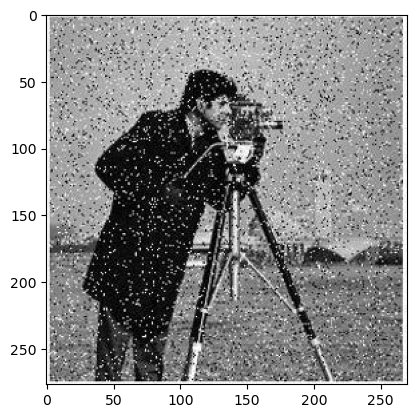

In [24]:
# Your code here
sample_image = io.imread("man.jpeg")
filter_kernel = fltr 
print(sample_image.shape)

R_1 = sample_image[:, :, 0] 
G_1 = sample_image[:, :, 1]
B_1 = sample_image[:, :, 2]

#formula for converting colour(RGB) to Gray Image scale Image
Y_sample = (0.299 * np.array(R_1)) + (0.587 * np.array(G_1)) + (0.114 * np.array(B_1)) 

plt.imshow(Y_sample , cmap = "gray")
print(Y_sample.shape)

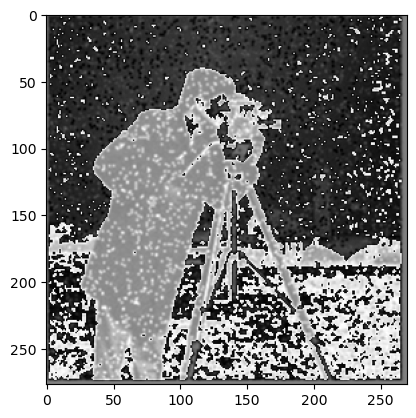

In [25]:
gaussian = MyConvAdder(Y_sample,fltr)
plt.imshow(gaussian, cmap = "gray")

This Gaussian filter inverts colors but helps to detect the edges.

## Low-pass filters

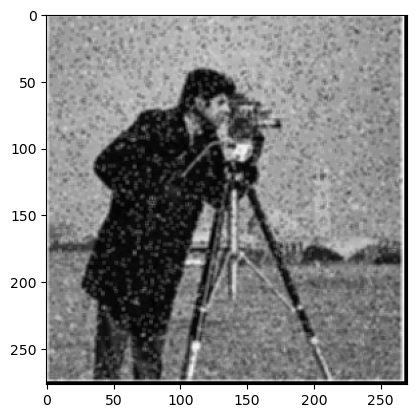

In [26]:
filt1_img = MyConvAdder(Y_sample,f1)
plt.imshow(filt1_img, cmap = "gray")

Performance of a basic low-pass filter which removed noise.

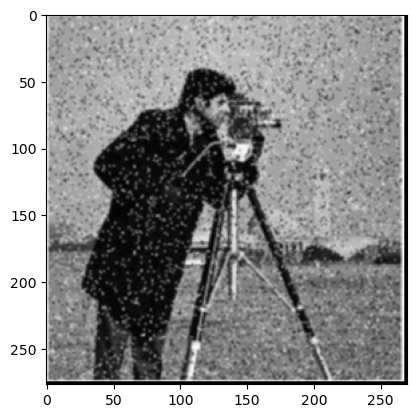

In [27]:
filt2_img = MyConvAdder(Y_sample,f2)
plt.imshow(filt2_img, cmap = "gray")

Again another low pass filter which helped to remove noise.

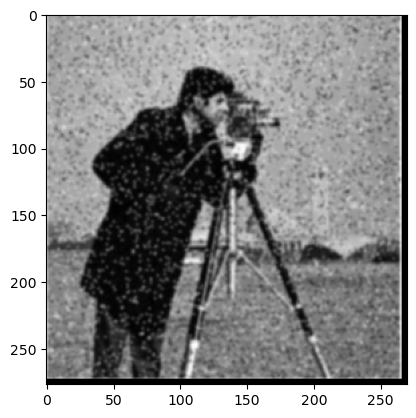

In [28]:
filt3_img = MyConvAdder(Y_sample,f3)
plt.imshow(filt3_img, cmap = "gray")

## High-pass filters

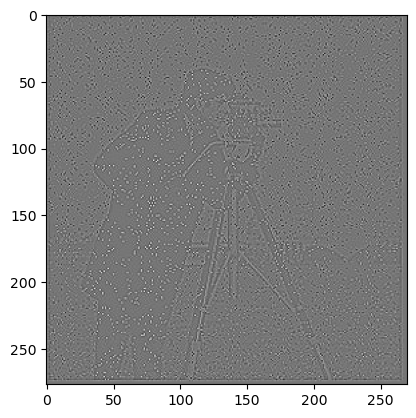

In [29]:
filt4_img = MyConvAdder(Y_sample,f4)
plt.imshow(filt4_img, cmap = "gray")

High-pass filter helped us to detect the edges on the image.

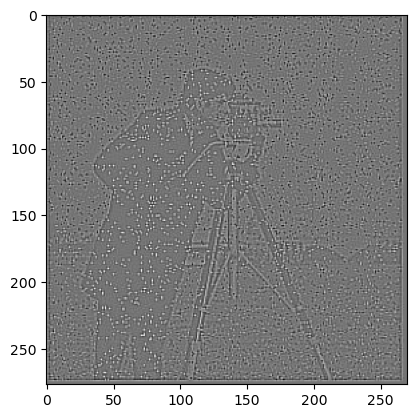

In [30]:
filt5_img = MyConvAdder(Y_sample,f5)
plt.imshow(filt5_img, cmap = "gray")

This filter was more precise when detecting the shapes and edges.

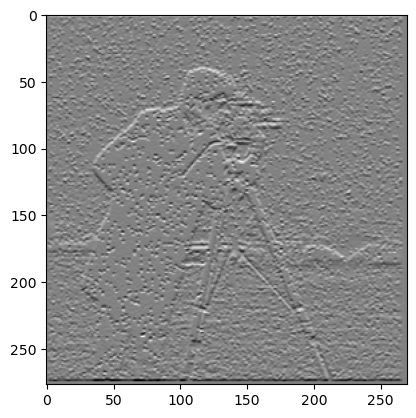

In [31]:
filt6_img = MyConvAdder(Y_sample,f6)
plt.imshow(filt6_img, cmap = "gray")

This filter helped to detect the shapes on the picture by making the "dents" on the surface.

### 1.4 Perform Approximate and Exact Convolution (5 points):
Use the MyConvAdder function to perform approximate convolution.
Use Python's own convolution function (e.g., from scipy.signal) to perform exact convolution.
Compare the results and calculate the error and similarity between the two convolution outputs.

In [117]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

exact_convolution_result = signal.convolve2d(Y_sample, f3, mode = "valid")

# Your code here
for i in range(7):
    print("Number of approximated bits on addition: ", i)
    approx_convolution_result = MyConvAdder(Y_sample, f3 , i)
   

    exact_convolution_result = np.resize(exact_convolution_result, np.shape(approx_convolution_result))
    # Compare results and calculate error/similarity
    error = mean_squared_error(exact_convolution_result, approx_convolution_result)
    print(error)
    similarity = ssim(exact_convolution_result, approx_convolution_result, data_range=exact_convolution_result.max() - exact_convolution_result.min())
    print(similarity)

Number of approximated bits on addition:  0
5391.320693446217
0.07225365813728529
Number of approximated bits on addition:  1
5336.431395157039
0.0727209532446828
Number of approximated bits on addition:  2
5235.293313093806
0.07215121072427426
Number of approximated bits on addition:  3
5598.383072111364
0.06731788554719592
Number of approximated bits on addition:  4
9148.908309516026
0.05010973229452614
Number of approximated bits on addition:  5
40780.05252371873
0.027141046617052585
Number of approximated bits on addition:  6
248821.1878611005
0.00647965153001785


### Commentary

This final computation showed, how the approximation influences the result of the filtering on the image. An already unapproximated adder has visible dissimilarities because of multiplication that was replaced by the addition. The approximation of first 3 bits does not take almost any effect but after that, with 4 and more approximated bits, the Mean Squared Error rapidly increases.